#### Subsequence mining of frequent temporal patterns

Jay Urbain, PhD

#### Frequent patterns

A frequent pattern is a pattern (set of items, subsequences, substructures, etc.) that occur frequently in a data set. Frequent pattern mining was first proposed by Agrawal, Imielinski, and Swami [AIS93] in the context of frequent itemsets and association rule mining

The motivation is to identify the inherent regularities, or frequent patterns in data.

For example: 
What medical events frequently co-occur within a medical encounter? 
- Lower back pain, spinal stenosis, ibuprofin
- Diabetes, metformin, foot exam
- myocardial ischemia, beta-blockers, ACE inhibitors

For the medical events above, what might be frequently occuring subsequent in future medical encounters?
- Oxycontin, spinal fusion surgery
- Low EF, myocardial ischemia
- STEMI, angioplasty

Each medical event, e.g., diabetes, metformin, ischemia, is considered an item. An itemset is a set of one or more items where the ordering does not matter. Items within an itemset are considered concurren:, e.g., STEMI and angioplasty.

$k-itemset$ $X = {x_1, …, x_k}$

Absolute support, or support count of $X$: Frequency or occurrence of an itemset $X$.

Relative support, $s$, is the fraction of transactions that contains $X$, i.e., the probability that a transaction contains $X$.

An itemset $X$ is *frequent* if *X*’s support is no less than a min suppport threshold.


#### Association rules

Rules can be defined from frequent itemsets.

The problem is to find all rules $X=>Y$ with minimum support and confidence. 
- Support, $s$, is the probability that a transaction contains $X \& Y$, i.e., $p(X,Y)$ 
- Confidence, $c$, is the conditional probability that a transaction (encounter) having $X$ also contains $Y$, i.e.,  $p(Y|X)$.

Example: 
Let  minsup = $0.5$, minconf = $0.5$

Frequent patterns: *myocardial ischemia:3, beta-blockers:2, ACE inhibitors:2, diabetes:2, metformin:2*. Foot exam:1 would not be a frequent pattern.

Association rules: *myocardial ischemia, beat-blockers $=>$ ACE inhibitors* would have support=2/4 and confidence 2/2. There are many more.

<table>
<tr><td>Encounter ID</td><td>Medical events</td></tr>
<tr><td>10</td><td>myocardial ischemia, beta-blockers, ACE inhibitors</td></tr>
<tr><td>20</td><td>Diabetes, metformin, foot exam</td></tr>
<tr><td>30</td><td>myocardial ischemia, diabetes, metformin, beta-blockers, ACE inhibitors</td></tr>
<tr><td>40</td><td>Diabetes, myocardial ischemia, metformin</td></tr>
</table> 



#### Subsequences

A subsequence is a sequence that can be derived from another sequence by deleting some elements without changing the order of the remaining elements. 

For example, the sequence $\{A,B,D\}$ is a subsequence of $\{A,B,C,D,E,F\}$. 

Subsequences are suitable for mining patient event histories since they can model frequently occuring sequential patterns across patient event histories without the necessity to match each element within a sequence. 

For example, $\{diabetes, low EF, STEMI\}$ would be a common subsequence across the two following patient event sequences: 
- $\{diabetes, metformin, lung cancer, low EF, STEMI\}$  
- $\{diabetes, ischemia, low EF, STEMI\}$ 

*Note: A subsequence should not be confused with substring which requires matching consecutive elements.*



#### Mining subsequence patterns

Frequent Pattern Mining - spark.mllib
Mining frequent items, itemsets, subsequences, or other substructures is usually among the first steps to analyze a large-scale dataset, which has been an active research topic in data mining for years. We refer users to Wikipedia’s association rule learning for more information. spark.mllib provides a parallel implementation of FP-growth, a popular algorithm to mining frequent itemsets.

FP-growth
The FP-growth algorithm is described in the paper Han et al., Mining frequent patterns without candidate generation, where “FP” stands for frequent pattern. Given a dataset of transactions, the first step of FP-growth is to calculate item frequencies and identify frequent items. Different from Apriori-like algorithms designed for the same purpose, the second step of FP-growth uses a suffix tree (FP-tree) structure to encode transactions without generating candidate sets explicitly, which are usually expensive to generate. After the second step, the frequent itemsets can be extracted from the FP-tree. In spark.mllib, we implemented a parallel version of FP-growth called PFP, as described in Li et al., PFP: Parallel FP-growth for query recommendation. PFP distributes the work of growing FP-trees based on the suffices of transactions, and hence more scalable than a single-machine implementation. We refer users to the papers for more details.

spark.mllib’s FP-growth implementation takes the following (hyper-)parameters:

minSupport: the minimum support for an itemset to be identified as frequent. For example, if an item appears 3 out of 5 transactions, it has a support of 3/5=0.6.
numPartitions: the number of partitions used to distribute the work.




Given a set of sequences, find the complete set of *frequent* subsequences. Consider each sequence as an ordering over the patient's event history.

Given the sequence: ${(ef) (ab)  (df) c b}$
    
Each element, i.e., $(ef), (ab), (df), c, b$; may contain a set of items. 

Items within an element are considered unordered (happen concurrently) and are listed alphabetically to avoid ambiguity. For example, events within a patient encounter could be considered items within an element set.

Example: 
$\{a(bc)dc\}$ is a subsequence  of $\{a(abc)(ac)d(cf)\}$

Example: 
Given minimum support threshold min_sup=2, $\{(ab)c\}$ is a sequential pattern
the following sequence database:  
<table>
<tr><td>SID</td><td>sequence</td></tr>
<tr><td>10</td><td>{a(abc)(ac)d(cf)}</td></tr>
<tr><td>20</td><td>{(ad)c(bc)(ae)}</td></tr>
<tr><td>30</td><td>{(ef)(ab)(df)cb}</td></tr>
<tr><td>40</td><td>{eg(af)cbc}</td></tr>
</table> 

FPGrowth implements the FP-growth algorithm. It take an RDD of transactions, where each transaction is an List of items of a generic type. Calling FPGrowth.train with transactions returns an FPGrowthModel that stores the frequent itemsets with their frequencies.

Refer to the FPGrowth Python docs for more details on the API.

In the Oracle datawarehouse query below, a basic aggregate query, the first step for generating a sequence database takes approximately 9 minutes (588 seconds).

This query generates item sets, i.e., medical events per encounter.

<img src='listaggquery.png'>

In [37]:
from IPython.display import HTML

HTML('''
<style>
table {float:left}
</style>

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pyspark.mllib.fpm import FPGrowth

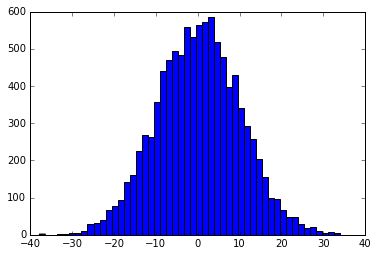

In [13]:
x = np.random.normal(0., 10, 10000)
plt.hist(x,50)
plt.show()


In [14]:
from pyspark.sql import SQLContext, HiveContext
from pyspark.sql.types import *
from datetime import datetime
import time
from pyspark.sql.functions import *
from pyspark.mllib.fpm import FPGrowth, PrefixSpan

In [24]:
sqlContext = HiveContext(sc)

dataf = sc.textFile("/Users/jayurbain/Dropbox/machine-learning/machine-learning/data/sample_fpgrowth.txt")
print dataf.take(10)
print type(dataf)

[u'r z h k p', u'z y x w v u t s', u's x o n r', u'x z y m t s q e', u'z', u'x z y r q t p']
<class 'pyspark.rdd.RDD'>


In [25]:
# fpgrowth
transactions = dataf.map(lambda line: line.strip().split(' '))
print transactions.take(5)
model = FPGrowth.train(transactions, minSupport=0.2, numPartitions=10)
result = model.freqItemsets().collect()
# for fi in result:
#     print(fi)

for i in result:
    print '(', ', '.join(i.items), ')', 'freq=', str(i.freq)

[[u'r', u'z', u'h', u'k', u'p'], [u'z', u'y', u'x', u'w', u'v', u'u', u't', u's'], [u's', u'x', u'o', u'n', u'r'], [u'x', u'z', u'y', u'm', u't', u's', u'q', u'e'], [u'z']]
FreqItemset(items=[u'z'], freq=5)
FreqItemset(items=[u'x'], freq=4)
FreqItemset(items=[u'x', u'z'], freq=3)
FreqItemset(items=[u'y'], freq=3)
FreqItemset(items=[u'y', u'x'], freq=3)
FreqItemset(items=[u'y', u'x', u'z'], freq=3)
FreqItemset(items=[u'y', u'z'], freq=3)
FreqItemset(items=[u'r'], freq=3)
FreqItemset(items=[u'r', u'x'], freq=2)
FreqItemset(items=[u'r', u'z'], freq=2)
FreqItemset(items=[u's'], freq=3)
FreqItemset(items=[u's', u'y'], freq=2)
FreqItemset(items=[u's', u'y', u'x'], freq=2)
FreqItemset(items=[u's', u'y', u'x', u'z'], freq=2)
FreqItemset(items=[u's', u'y', u'z'], freq=2)
FreqItemset(items=[u's', u'x'], freq=3)
FreqItemset(items=[u's', u'x', u'z'], freq=2)
FreqItemset(items=[u's', u'z'], freq=2)
FreqItemset(items=[u't'], freq=3)
FreqItemset(items=[u't', u'y'], freq=3)
FreqItemset(items=[u't', u'

In [30]:
data = [
[["a", "b"], ["c"]],
[["a"], ["c", "b"], ["a", "b"]],
[["a", "b"], ["e"]],
[["f"]]]
rdd = sc.parallelize(data, 2)
model = FPGrowth.train(transactions, minSupport=0.2, numPartitions=10)
result = model.freqItemsets().collect()
for i in result:
    print '(', ', '.join(i.items), ')', 'freq=', str(i.freq)
    
sorted(model.freqItemsets().collect())

( z ) freq= 5
( x ) freq= 4
( x, z ) freq= 3
( y ) freq= 3
( y, x ) freq= 3
( y, x, z ) freq= 3
( y, z ) freq= 3
( r ) freq= 3
( r, x ) freq= 2
( r, z ) freq= 2
( s ) freq= 3
( s, y ) freq= 2
( s, y, x ) freq= 2
( s, y, x, z ) freq= 2
( s, y, z ) freq= 2
( s, x ) freq= 3
( s, x, z ) freq= 2
( s, z ) freq= 2
( t ) freq= 3
( t, y ) freq= 3
( t, y, x ) freq= 3
( t, y, x, z ) freq= 3
( t, y, z ) freq= 3
( t, s ) freq= 2
( t, s, y ) freq= 2
( t, s, y, x ) freq= 2
( t, s, y, x, z ) freq= 2
( t, s, y, z ) freq= 2
( t, s, x ) freq= 2
( t, s, x, z ) freq= 2
( t, s, z ) freq= 2
( t, x ) freq= 3
( t, x, z ) freq= 3
( t, z ) freq= 3
( p ) freq= 2
( p, r ) freq= 2
( p, r, z ) freq= 2
( p, z ) freq= 2
( q ) freq= 2
( q, y ) freq= 2
( q, y, x ) freq= 2
( q, y, x, z ) freq= 2
( q, y, z ) freq= 2
( q, t ) freq= 2
( q, t, y ) freq= 2
( q, t, y, x ) freq= 2
( q, t, y, x, z ) freq= 2
( q, t, y, z ) freq= 2
( q, t, x ) freq= 2
( q, t, x, z ) freq= 2
( q, t, z ) freq= 2
( q, x ) freq= 2
( q, x, z ) freq= 2


[FreqItemset(items=[u'p'], freq=2),
 FreqItemset(items=[u'p', u'r'], freq=2),
 FreqItemset(items=[u'p', u'r', u'z'], freq=2),
 FreqItemset(items=[u'p', u'z'], freq=2),
 FreqItemset(items=[u'q'], freq=2),
 FreqItemset(items=[u'q', u't'], freq=2),
 FreqItemset(items=[u'q', u't', u'x'], freq=2),
 FreqItemset(items=[u'q', u't', u'x', u'z'], freq=2),
 FreqItemset(items=[u'q', u't', u'y'], freq=2),
 FreqItemset(items=[u'q', u't', u'y', u'x'], freq=2),
 FreqItemset(items=[u'q', u't', u'y', u'x', u'z'], freq=2),
 FreqItemset(items=[u'q', u't', u'y', u'z'], freq=2),
 FreqItemset(items=[u'q', u't', u'z'], freq=2),
 FreqItemset(items=[u'q', u'x'], freq=2),
 FreqItemset(items=[u'q', u'x', u'z'], freq=2),
 FreqItemset(items=[u'q', u'y'], freq=2),
 FreqItemset(items=[u'q', u'y', u'x'], freq=2),
 FreqItemset(items=[u'q', u'y', u'x', u'z'], freq=2),
 FreqItemset(items=[u'q', u'y', u'z'], freq=2),
 FreqItemset(items=[u'q', u'z'], freq=2),
 FreqItemset(items=[u'r'], freq=3),
 FreqItemset(items=[u'r', u'

In [27]:
data = [
[["a", "b"], ["c"]],
[["a"], ["c", "b"], ["a", "b"]],
[["a", "b"], ["e"]],
[["f"]]]
rdd = sc.parallelize(data, 2)
#rdd = sc.parallelize(transactions, 2)
print rdd.take(5)
model = PrefixSpan.train(rdd)
sorted(model.freqSequences().collect())

[[['a', 'b'], ['c']], [['a'], ['c', 'b'], ['a', 'b']], [['a', 'b'], ['e']], [['f']]]


[FreqSequence(sequence=[[u'a']], freq=3),
 FreqSequence(sequence=[[u'a'], [u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b'], [u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b'], [u'b']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b'], [u'b', u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b', u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b', u'c']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b', u'c'], [u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b', u'c'], [u'b']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'b', u'c'], [u'b', u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'c']], freq=2),
 FreqSequence(sequence=[[u'a'], [u'c'], [u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'c'], [u'b']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'c'], [u'b', u'a']], freq=1),
 FreqSequence(sequence=[[u'a'], [u'e']], freq=1),
 FreqSequence(sequence=[[u'b']], freq=3),
 FreqSequence(sequence=[[u'b'], [u'a']], freq=